In [59]:
import sys

if sys.version_info.major == 3:
    print('OK')
elif sys.version_info.major == 2:
    print('ERROR: están usando python 2, deberían usar 3')
else:
    print('ERROR: wtf, qué versión de python es esta?')


OK


In [60]:
import numpy
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import keras
import h5py
import PIL
import seaborn as sns
import plotly
import sklearn_pandas


print('OK (puede salir algún warning, eso no sería problema)')


OK (puede salir algún warning, eso no sería problema)


In [61]:
backend = keras.backend.backend()

if backend == 'tensorflow':
    print('OK')
else:
    print('ERROR: el backend de keras no es tensorflow, sino', backend)

OK


In [62]:
matches = pd.read_csv('./atp_matches_till_2022_mod.csv')

In [63]:
matches.shape

(188161, 50)

In [64]:
matches.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,p1_id,p1_seed,p1_entry,p1_name,p1_hand,p1_ht,p1_ioc,p1_age,p2_id,p2_seed,p2_entry,p2_name,p2_hand,p2_ht,p2_ioc,p2_age,score,best_of,round,minutes,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,p1_rank,p1_rank_points,p2_rank,p2_rank_points,winner
101488,1995-D049,Davis Cup G1 QF: IND vs HKG,Grass,4,D,19950203,5,108832,NaN,NaN,Thorsten Poelzl,U,NaN,HKG,20.4,102405,NaN,NaN,Mahesh Bhupathi,R,185.0,IND,20.6,7-6(6) 7-5,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.0,132.0,1
159547,2012-540,Wimbledon,Grass,128,G,20120625,98,104338,15.0,NaN,Juan Monaco,R,185.0,ARG,28.2,104678,NaN,NaN,Viktor Troicki,R,193.0,SRB,26.3,7-5 7-5 6-3,5,R32,158.0,0.0,2.0,115.0,78.0,46.0,17.0,16.0,7.0,13.0,13.0,9.0,115.0,64.0,54.0,19.0,17.0,6.0,9.0,14.0,2115.0,34.0,1190.0,2
33366,1976-661,Dusseldorf,Clay,64,A,19760522,18,100235,NaN,NaN,Antonio Munoz,R,NaN,ESP,25.2,100130,NaN,Q,Vladimir Zednik,R,NaN,CZE,29.3,6-7 6-4 7-6,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22710,1974-324,Maui,Hard,32,A,19741006,9,100105,NaN,NaN,Allan Stone,R,NaN,AUS,28.9,100127,4.0,NaN,Tom Gorman,R,180.0,USA,28.7,6-3 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,18.0,NaN,2
99435,1994-540,Wimbledon,Grass,128,G,19940620,49,101414,7.0,NaN,Boris Becker,R,190.0,GER,26.5,101609,NaN,NaN,David Wheaton,R,193.0,USA,25.0,6-2 6-4 6-3,5,R128,NaN,15.0,3.0,93.0,63.0,52.0,19.0,13.0,4.0,4.0,10.0,9.0,117.0,75.0,58.0,7.0,14.0,8.0,13.0,10.0,2159.0,107.0,434.0,1


In [65]:
pd.options.display.max_columns = None


# 1. Listado de variables y selección

**Por cada variable explicar en una oración el contenido de dicha variable y definir si será utilizada como variable de entrada, de salida, o no será utilizada.**

**Para la variable de salida especificar los valores posibles que puede tener.**

**Por cada variable que no se vaya a utilizar, explicar brevemente el motivo.**


# Variables de entrada:
**No tienen relevancia y no serán utilizadas:**

* tourney_id: Es un número que identifica el torneo.
* tourney_name: Nombre del torneo.
* tourney_date: Fecha del torneo.
* p1_id / p2_id: Identificador único del jugador ganador/perdedor.
* draw_size: Tamaño del sorteo del torneo.
* p1_name / p2_name: Nombre del jugador ganador/perdedor.
* p1_ioc / p2_ioc: Código ISO del país del jugador ganador/perdedor
* score (marcador del partido), minutes (minutos de juego del partido), p1_ace / p2_ace (cantidad de aces que logró el jugador), p1_df / p2_df (cantidad de doble faltas que los jugadores realizó durante el partido), p1_svpt / lsvpt (cantidad de puntos que los jugadores jugaron en total durante el partido), p1_1stIn / p2_1stIn (porcentaje de primeros servicios realizados con éxito), p1_1stWon / p2_1stWon (porcentaje de puntos ganados luego de colocar bien el primer servicio), p1_2ndWon / p2_2dnWon (porcentaje de puntos ganados luego de colocar bien el segundo servicio), p1_SvGms / p2_SvGms (cantidad de puntos ganados cuando el encargado del servicio es el jugador), p1_bpSaved / p2_bpSaved (breakpoints que el jugador logró ganar), p1_bpFaced / p2_bpFaced (breakpoints que el jugador enfrentó): Son campos que no son relevantes ya que queremos realizar la predicción del partido antes de que comience, es decir, antes de que estos datos sean posibles.
    
**Tienen relevancia y serán utilizadas:**
* surface: Superficie de la cancha (arcilla, césped, dura, etc.). Es relevante para predecir el resultado del partido, ya que algunos jugadores pueden tener más habilidades en ciertos tipos de superficie.
* tourney_level: Idica el nivel del torneo, esto influye en los premios que otorga en cantidad de dinero y los puntos que aporta para el ranking. 
* match_num: Tendría relevancia ya que los jugadores no llegan en el mismo estado físico a un partido a inicios del torneo que a finales.
* p1_seed / p2_seed: Número de cabeza de serie del jugador ganador/perdedor. Es relevante porque se supone que los jugadores que resultan cabezas de serie tienen partidos contra oponentes de menor nivel.
* p1_entry / p2_entry: Tipo de entrada del jugador ganador/perdedor (wildcard, clasificado, etc.). Es relevante ya que se supone que hay una diferencia de nivel entre jugadores que ingresan por clasificación a diferencia de los que ingresan por invitación, por ejemplo.
* p1_hand / p2_hand: Mano hábil del jugador ganador/perdedor (izquierda o derecha). Es relevante para predecir el resultado del partido, ya que algunos jugadores pueden tener más ventaja al enfrentarse con jugadores que utilicen alguna mano en particular.
* p1_ht / p2_ht: Altura del jugador ganador/perdedor en centímetros. Es relevante, ya que algunos jugadores pueden tener ventajas en altura que les permiten tener más potencia en su juego.
* p1_age / p2_age: Edad del jugador ganador/perdedor en años. Es relevante para predecir el resultado del partido, ya que algunos jugadores pueden tener más resistencia y habilidades físicas en ciertas edades.
* best_of: Número de sets que se juegan en el partido (3 o 5). Es relevante para predecir el resultado del partido, ya que algunos jugadores pueden tener más habilidades en partidos más largos (o cortos).
* p1_rank / p2_rank: Ranking del jugador ganador y perdedor en el momento en que se jugó el partido.
* p1_rank_points / p2_rank_points: Puntos de ranking del jugador ganador y perdedor en el momento en que se jugó el partido.

---

# Variable de salida:
* winner: Campo nuevo generado, los posibles valores que puede contener son 1 si predice que ganará el jugador p1 o 2 si predice que ganará el jugador p2


    

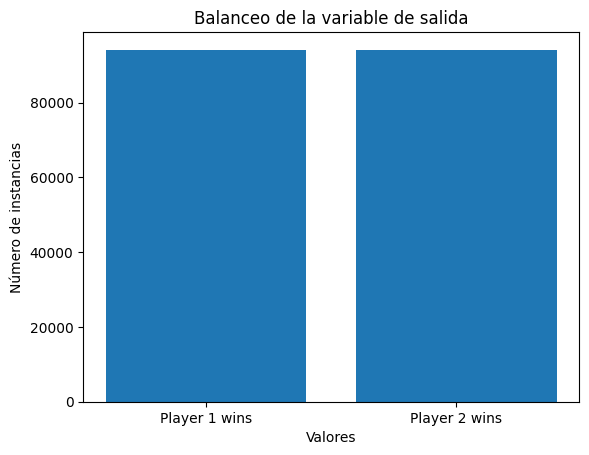

In [66]:

#Para la variable de salida, explicar y graficar su balanceo y qué consecuencias va a tener eso a la hora de entrenar y medir el rendimiento de distintos modelos.


# contar el número de instancias para cada valor
counts = matches['winner'].value_counts()

# graficar el balanceo
plt.bar(['Player 1 wins', 'Player 2 wins'], counts.values)
plt.title('Balanceo de la variable de salida')
plt.xlabel('Valores')
plt.ylabel('Número de instancias')
plt.show()


El gráfico muestra el balanceo de la variable de salida "winner" en el conjunto de datos. Como se puede observar, el número de instancias donde el jugador 1 gana y el número de instancias donde el jugador 2 gana son prácticamente iguales, lo que indica un balance casi perfecto. 

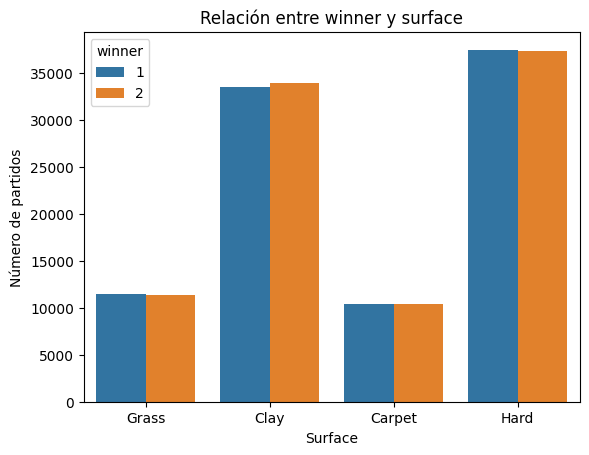

In [67]:
#Para 5 variables de entrada (elegidas o no, pero incluyendo al menos 3 elegidas) graficar y explicar cómo se comportan y cómo afectan a la variable de salida.

sns.countplot(x='surface', hue='winner', data=matches)
plt.title('Relación entre winner y surface')
plt.xlabel('Surface')
plt.ylabel('Número de partidos')
plt.show()



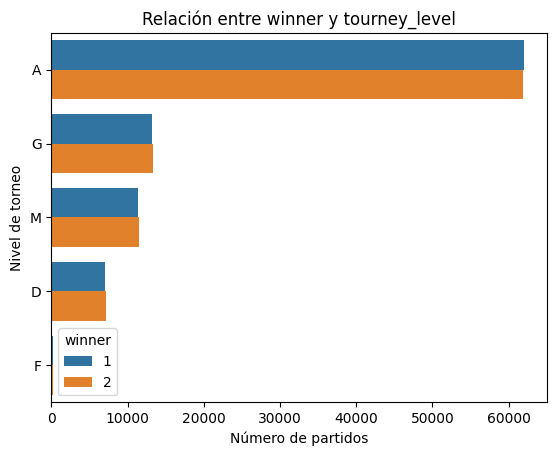

In [68]:
sns.countplot(y='tourney_level', hue='winner', data=matches, order=matches['tourney_level'].value_counts().index)
plt.title('Relación entre winner y tourney_level')
plt.xlabel('Número de partidos')
plt.ylabel('Nivel de torneo')
plt.show()


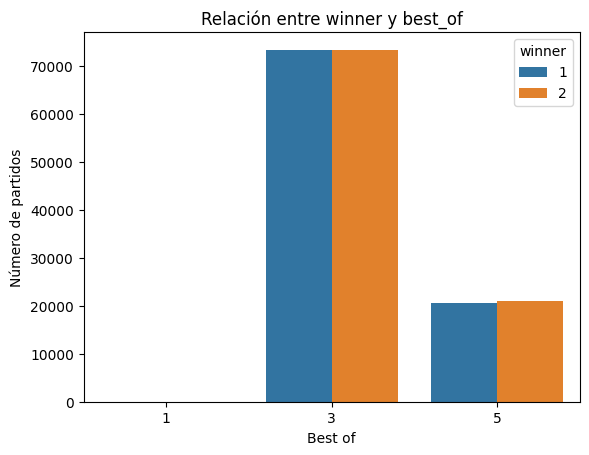

In [69]:
best_of_counts = matches.groupby(['best_of', 'winner']).size().unstack()
sns.countplot(x='best_of', hue='winner', data=matches)
plt.title('Relación entre winner y best_of')
plt.xlabel('Best of')
plt.ylabel('Número de partidos')
plt.show()


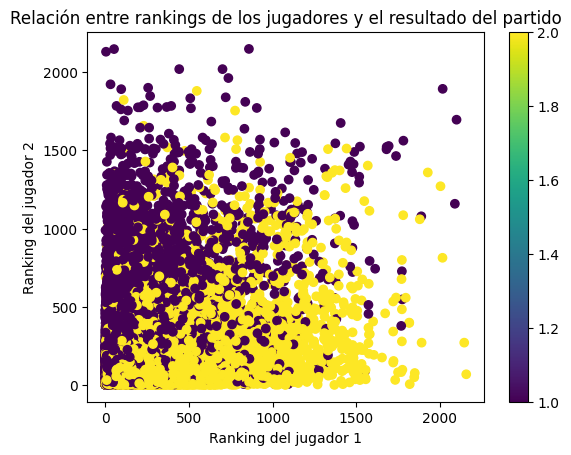

In [70]:
plt.scatter(matches['p1_rank'], matches['p2_rank'], c=matches['winner'], cmap='viridis')
plt.colorbar()

plt.xlabel('Ranking del jugador 1')
plt.ylabel('Ranking del jugador 2')
plt.title('Relación entre rankings de los jugadores y el resultado del partido')
plt.show()

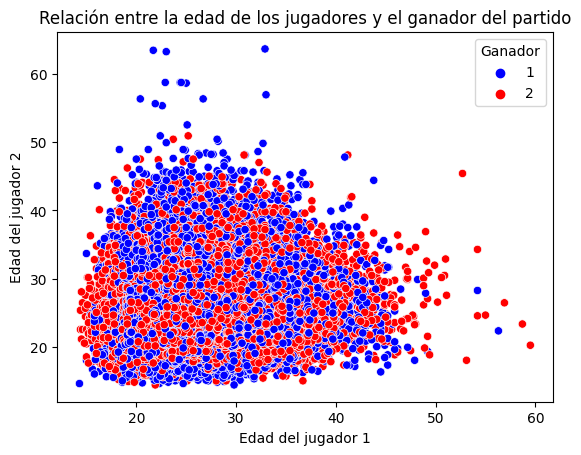

In [71]:
sns.scatterplot(data=matches, x="p1_age", y="p2_age", hue="winner", palette={1: 'blue', 2: 'red'})
plt.title('Relación entre la edad de los jugadores y el ganador del partido')
plt.xlabel('Edad del jugador 1')
plt.ylabel('Edad del jugador 2')
plt.legend(title="Ganador")
plt.show()

* surface, tourney_level y best_of: El gráfico muestra que la cantidad de partidos ganados es similar para el jugador 1 y el jugador 2 independientemente de la superficie, el nivel del torneo y el modo de juego (cantidad de sets) lo que indica estos campos no tiene un impacto significativo en el resultado del partido.

* p1_rank / p2_rank: En este caso si se observa que hay una tendencia en la cual el jugador que posee un ranking mas alto (menor numero) gana el partido.

* p1_age / p2_age: En el caso de la edad, parece haber resultados muy distintos, no se alcanza a apreciar con claridad que los jugadores más jovenes tengan una tendencia ganadora, como se podría llegar a creer. 



**Para cada una de las variables de entrada elegidas, explicar si se debería realizar o no alguna transformación para poder utilizarla como entrada de un modelo y por qué.**


* surface: El campo puede tomar 4 valores distintos, siendo todos ellos strings, los cuales son: Hard, Clay, Grass y Carpet. Lo mejor para transformar estos datos sería convertir la columna usando one-hot encode, quedando así 4 columnas que tendrían como nombre los 4 tipos de superficie, y sus valores serían 1 para la superficie en donde se jugó el partido y 0 para el resto.

* tourney_level: Mismo caso que surface, tiene solo 5 valores distintos: A, G, M, D y F. Quedarían 5 columnas en las que además se interpretaría mejor la información que con una sola letra.

* match_num: No necesita transformación, es un entero que representa el número de partido dentro del torneo que se está disputando.

* p1_seed / p2_seed: Requiere transformarse a un entero, ya que en el dataset se presenta como un numero flotante y al ser una posición, siempre será entero.

* p1_entry / p2_entry: Con este campo se podría también utilizar one-hot encode, ya que puede tomar 5 valores posibles.

* p1_hand / p2_hand: En este campo se debería usar one-hot encode para los 3 tipos de valores que puede tomar L (izquierdo), R (derecho) y U (ambidiestro)

* p1_ht / p2_ht: Habría que transformar la variable a un entero, ya que ésta representa los cm de altura de un jugador y para la precisión que requerimos no necesitaríamos que sea un float.

* p1_age / p2_age: No es necesario realizar ninguna transformación.

* best_of: Habría que transformarla con one-hot encode, los valores posibles son 1, 3 y 5.

* p1_rank / p2_rank: Transformarlo a un entero, ya que es una posición.

* p1_rank_points / p2_rank_points: Transformarlo a un entero ya que es una cantidad de puntos.


In [72]:
# seleccionar columnas de interés
cols = ["surface", "tourney_level", "match_num", "p1_seed", "p2_seed", "p1_hand", "p2_hand", "p1_ht", "p2_ht", "p1_age", "p2_age", "best_of", "p1_rank", "p2_rank", "p1_rank_points", "p2_rank_points"]

# mostrar información y estadísticas descriptivas
matches[cols].info()
print()
print(matches[cols].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188161 entries, 0 to 188160
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   surface         185844 non-null  object 
 1   tourney_level   188161 non-null  object 
 2   match_num       188161 non-null  int64  
 3   p1_seed         52400 non-null   float64
 4   p2_seed         52631 non-null   float64
 5   p1_hand         188121 non-null  object 
 6   p2_hand         188120 non-null  object 
 7   p1_ht           165708 non-null  float64
 8   p2_ht           165679 non-null  float64
 9   p1_age          185041 non-null  float64
 10  p2_age          185121 non-null  float64
 11  best_of         188161 non-null  int64  
 12  p1_rank         149045 non-null  float64
 13  p2_rank         148986 non-null  float64
 14  p1_rank_points  105156 non-null  float64
 15  p2_rank_points  105171 non-null  float64
dtypes: float64(10), int64(2), object(4)
memory usage: 23.0+ 

* **Analizar si las variables de entrada seleccionadas presentan valores nulos y/o extremos. En caso de encontrar dichas condiciones, indicar qué tratamiento se podría darle a las mismas y por qué.**

 * p1_seed / p2_seed: solo hay poco más de 52400 datos cuando el dataset tiene 188161 columnas. No se puede tener en cuenta dicha variable si hay tantos valores nulos.

  * p1_rank_points / p1_rank_points: hay muchos datos faltantes, más de 80000. Lo mejor sería ignorar esta columna para el analisis. No vamos a tener los puntos exactos del ranking pero si el puesto.

 * p1_age / p2_age: hay datos faltantes, los cuales son pocos para la cantidad de datos que estamos manejando (algo más de 3000). Lo mejor sería analizar si se puede recuperar la edad del jugador a parir de su id, que por más que no usamos, está en el dataset y puede ser de ayuda. En caso de no encontrarla, se podría descartar ese partido o rellenarlo con un dato promedio. 

 * p1_ht / p2_ht: Ocurre algo similar que con px_age. Se podría intentar recuperar la altura del jugador a partir de su id y en caso de no hallarla, rellenar el campo con el dato promedio.  

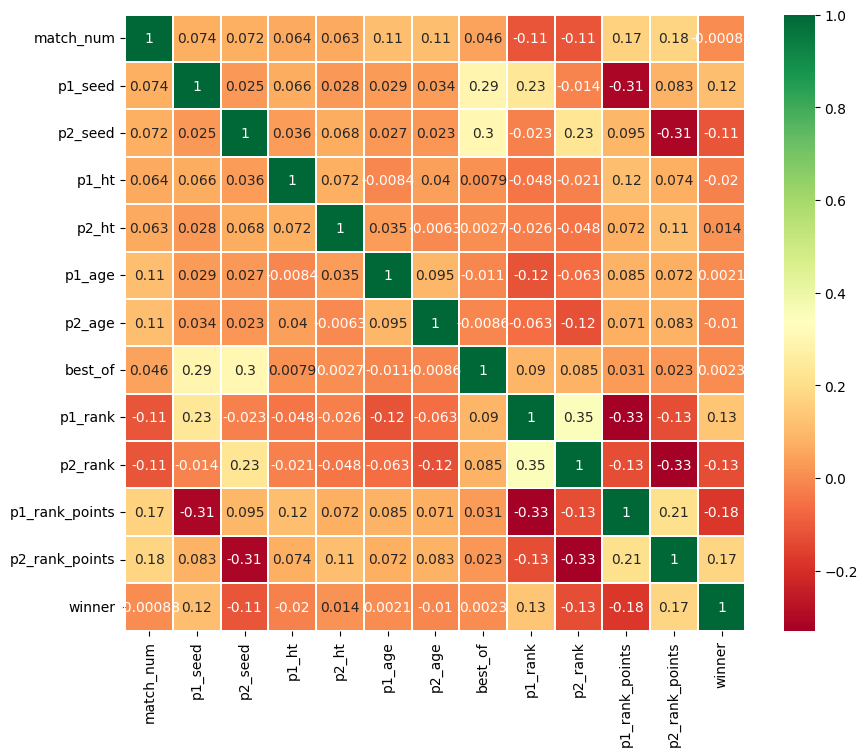

In [73]:
# Calcular correlación
corr = matches[['match_num', 'p1_seed', 'p2_seed', 'p1_ht', 'p2_ht', 'p1_age', 'p2_age', 'best_of', 'p1_rank', 'p2_rank', 'p1_rank_points', 'p2_rank_points', 'winner']].corr()

# Graficar mapa de calor
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()




* **Verificar si existen variables altamente correlacionadas con la variable "target". En dicho caso, explicar por qué considera que esto pasa.**

 * Como se observa en el mapa de calor, no hay variables de entrada altamente relacionadas con la variable "target" (winner).



---
# 3. Hipótesis sobre los datos

* **Formular y describir de forma coloquial al menos una hipótesis sobre los datos que podría explicar el valor de la variable "target" bajo determinadas condiciones. Realizar un análisis para contrastar si dicha hipótesis se valida o, por el contrario, se refuta a partir de los datos.**

 * Las hipótesis que podemos realizar antes de hacer un análisi de los gráficos, es que los jugadores que se posicionan más arriba en el ranking son los que tienen la mayor posibilidad de ganar un partido porque se supone que tienen mayores habilidades. Esto a simple vista queda demostrado en el gráfico que relaciona el ranking de los jugadores con el resultado del partido. Podemos observar una especie de linea imaginaria en la diagonal principal, que es el punto donde uno de los dos jugadores supera al otro en el ranking.

 * Hay datos claves como surface y tourney_level que no se pueden analizar en el mapa de calor porque no son variables numericas. Seria interesante ver la correlacion de esas variable con respecto al resultado del partido una vez que hagamos las trasnformaciones necesarias utilizar esas columnas.

* **Describa y presente cualquier otro hallazgo que sea capaz de encontrar en los datos. Explique el impacto que podría tener en la creación de un modelo.**

  * Creemos que resulta pertinente aclarar como era el dataset original y como lo fuimos modificando para que sea válido para realizar el trabajo práctico.
En un principio los valores de las columnas no eran de la forma p1_x (o p2_x) donde x es age, ht, hand, etc. El dataset original tiene esas variable con el nombre winner_x y loser_x.
Nosotros al final de todos los datos agregamos una columna winner, la cual iba a tener el valor 1 si ganaba el jugador 1 y 2 si ganaba el jugador 2. Nuestra idea en un principio era remplazar winner_x por p1_x y loser_x por p2_x. El problema es que al hacer esto el campo winner siempre iba a ser igual a 1 lo que generaría un sesgo en los datos.
Para contrarrestar eso, intercambiamos aleatoriamente los datos del jugador 1 y el jugador 2 (y el campo winner). Eso lo hicimos con el siguiente codigo:



```python
import random
import pandas as pd

matches = pd.read_csv('C:/Users/Usuario/Downloads/atp_matches_till_2022.csv')

matches['winner'] = matches['winner'].astype(int)

# indices de las columnas que empiezan con 'p1_' y 'p2_'
p1_cols = [i for i in range(len(matches.columns)) if matches.columns[i].startswith('p1_')]
p2_cols = [i for i in range(len(matches.columns)) if matches.columns[i].startswith('p2_')]

print(p1_cols)
print(p2_cols)

def swap_cols_and_set_winner(row):
    if random.random() < 0.5:
        for i in range(len(p1_cols)):
            p1_col_idx = p1_cols[i]
            if p1_col_idx < len(row):
                p1_val = row[p1_col_idx]
                p2_col_idx = p2_cols[i]
                if p2_col_idx < len(row):
                    p2_val = row[p2_col_idx]
                    row[p1_col_idx] = p2_val
                    row[p2_col_idx] = p1_val
        row['winner'] = 2
    return row

matches = matches.apply(swap_cols_and_set_winner, axis=1)

matches.to_csv('C:/Users/Usuario/Downloads/atp_matches_till_2022_mod.csv', index=False)
```

Esto generó que los datos tengan un balance casi perfecto en donde el 50% de las veces gana el jugador 1 en el 50% restante el jugador 2. No sabemos exactamente cual será el impacto en el resultado de este cambio que realizamos, pero al no ver ninguna variable que esté estrechamente relacionada con el campo winner creemos que tal vez el entrenamiento del modelo no arroje buenos resultados.
